In [1]:
import pandas as pd
dave_df = pd.read_csv(filepath_or_buffer='/kaggle/input/crossword-puzzles-and-clues/big_dave.csv', index_col=['rowid'], 
                      parse_dates=['puzzle_date']).drop(columns=['source_url', 'source'],)
times_df = pd.read_csv(filepath_or_buffer='/kaggle/input/crossword-puzzles-and-clues/times.csv', index_col=['rowid'], 
                       parse_dates=['puzzle_date']).drop(columns=['source_url', 'source'])
df = pd.concat(objs=[times_df, dave_df]).drop_duplicates().dropna(subset='answer')
df.head()

,clue,answer,definition,clue_number,puzzle_date,puzzle_name
rowid,,,,,,
1,"Acquisitive chap, as we see it (8)",COVETOUS,Acquisitive,1a,2019-08-08,Times 27424
2,Back yard fencing weak and sagging (6),DROOPY,sagging,5a,2019-08-08,Times 27424
3,"Stripping off uniform, love holding colonel's ...",UNCLOTHING,Stripping,8a,2019-08-08,Times 27424
4,Without a mark where they should be gained (4),EXAM,where they should be gained,9a,2019-08-08,Times 27424
5,"Put a stop to Rugby's foul school leader (5,2,...",KNOCK ON THE HEAD,Put a stop to,10a,2019-08-08,Times 27424


In [2]:
df.shape

(314558, 6)

We have a lot of data here: 315k clues and answers; what are our most popular answers?

In [3]:
from plotly.express import bar
bar(data_frame=df['answer'].value_counts().to_frame().reset_index().head(n=50), x='answer', y='count')

Let's look at puzzle length over time; we can do that by counting how many times a date appears in our dataset, since the puzzle date appears in every record and each record represents a clue/answer pair.

In [4]:
from plotly.express import scatter
scatter(data_frame=df[['puzzle_date']].groupby(by='puzzle_date').size().to_frame().resample(rule='W').mean().reset_index(),
        x='puzzle_date', y=0, trendline='rolling', trendline_options=dict(window=26), trendline_color_override='orange')

This gives us a weekly graph of the mean puzzle size; weekly averaging gives us a less noisy-looking graph than the raw daily data. Adding a 6-month rolling average trendline in a contrasting color gives us a relatively smooth single line.

In [5]:
from plotly.express import scatter
scatter(data_frame=df[['puzzle_date']].groupby(by='puzzle_date').size().to_frame().resample(rule='M').mean().reset_index(),
        x='puzzle_date', y=0, trendline='rolling', trendline_options=dict(window=6), trendline_color_override='orange')

A monthly mean is a clearer picture and probably gets at a story we might want to tell: puzzles got bigger pretty steadily until 2018, then hit a plateau, and over the last year got substantially smaller.

(-0.5, 1199.5, 1199.5, -0.5)

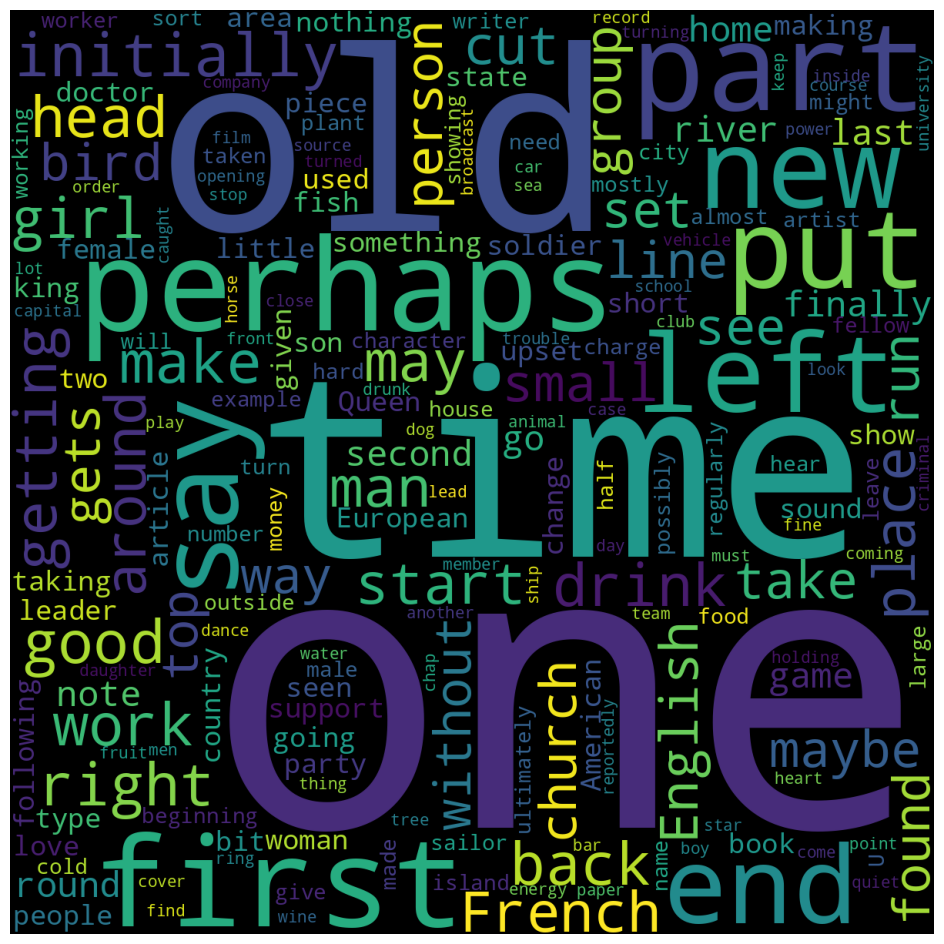

In [6]:
from matplotlib.pyplot import subplots
from matplotlib.pyplot import axis
from matplotlib.pyplot import imshow
from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords=STOPWORDS.union(set('s'))
subplots(figsize=(12, 12))
text = ' '.join(df['clue'].fillna(value='').values)
imshow(X=WordCloud(random_state=2023, height=1200, width=1200, stopwords=stopwords).generate(text=text), )
axis('off')

(-0.5, 1199.5, 1199.5, -0.5)

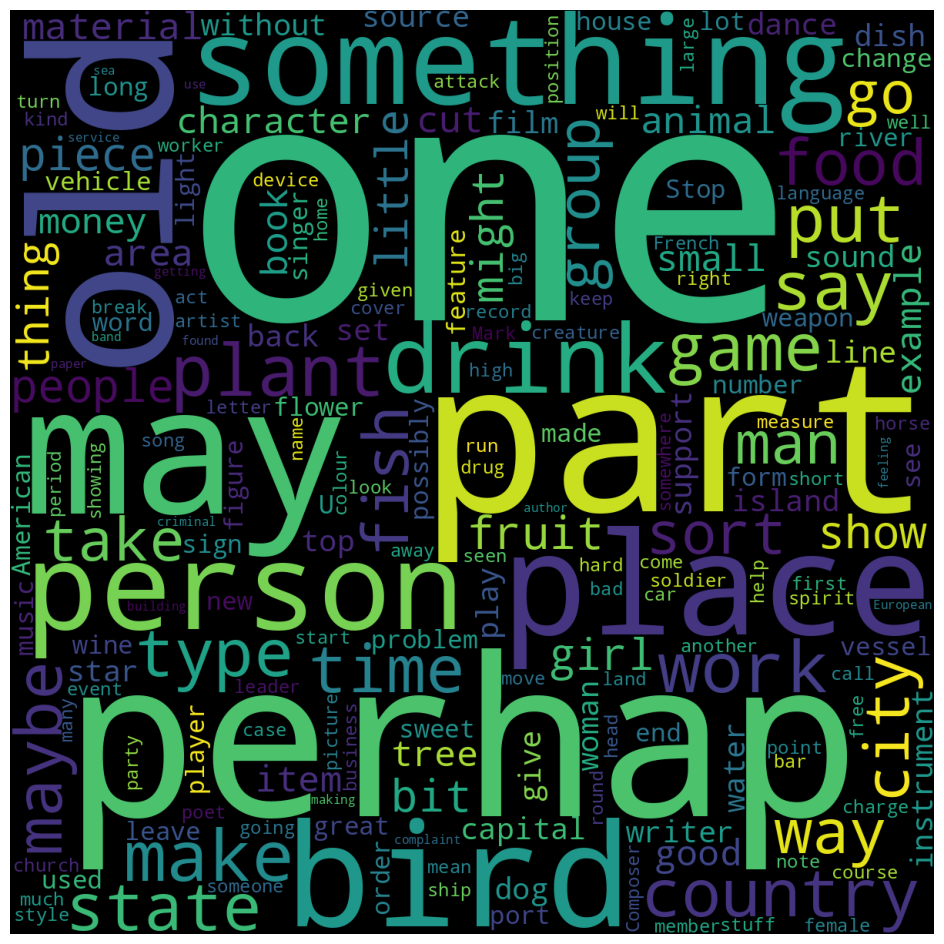

In [7]:
subplots(figsize=(12, 12))
text = ' '.join(df['definition'].fillna(value='').values)
imshow(X=WordCloud(random_state=2023, height=1200, width=1200, stopwords=stopwords).generate(text=text), )
axis('off')

(-0.5, 1199.5, 1199.5, -0.5)

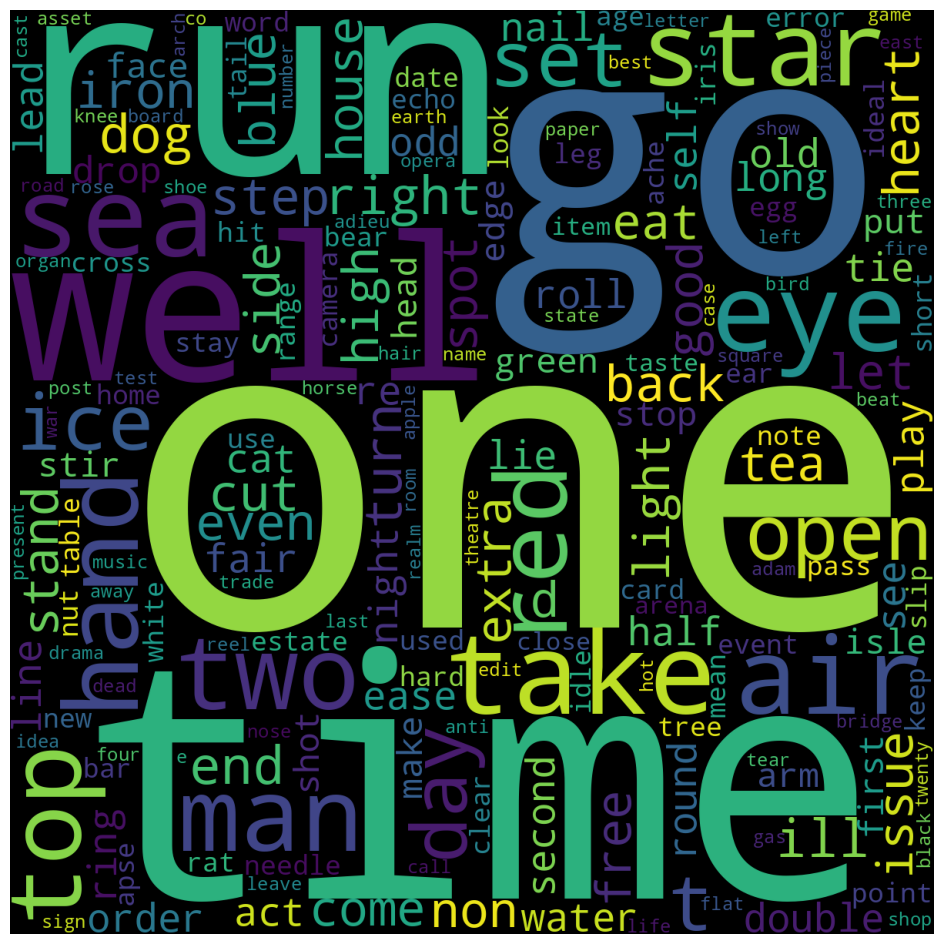

In [8]:
subplots(figsize=(12, 12))
text = ' '.join(df['answer'].values).lower()
imshow(X=WordCloud(random_state=2023, height=1200, width=1200, stopwords=stopwords).generate(text=text), )
axis('off')

Our word cloud looks very different from our answer count bar chart above because of multi-word answers.  